In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [19]:
def test(df):
    dfdata = df.corr()
    plt.subplot()
    sns.heatmap(dfdata,vmax=1,square=True,cmap='Blues')
    plt.show()
    

In [20]:
data_train = pd.read_csv('train_V2.csv',encoding='UTF-8')


In [21]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


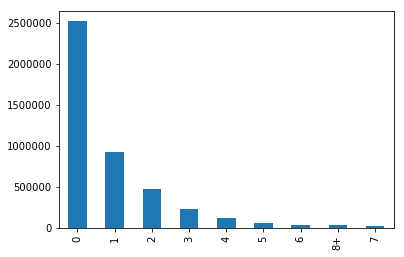

In [6]:
fig = plt.figure()
fig.set(alpha=0.2)
#plt.subplot2grid((2,3),(0,0))
df = data_train.copy()
df.loc[df.kills > df.kills.quantile(0.99)] = '8+'
df.kills.value_counts().plot(kind='bar')

#画出kills和winPlacePerc的关系图

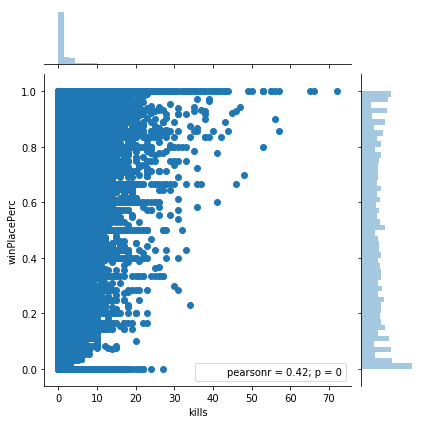

In [8]:
sns.jointplot(x='kills',y='winPlacePerc',data=data_train)

从上图可以看出来，kills和winPlacePerc的成正相关的，皮尔选相关系数为0.42，证明这俩个特征的相连性还是蛮大的

画出kills和winPlacePerc的线性回归方程如下

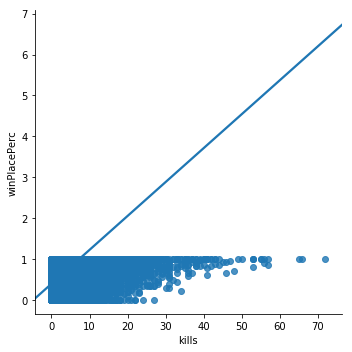

In [11]:
sns.lmplot(x='kills',y='winPlacePerc',data=data_train)

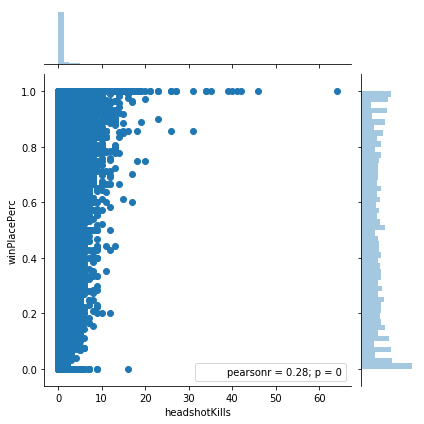

In [15]:
sns.jointplot(x='headshotKills',y='winPlacePerc',data=data_train)

从图中可知爆头对取得的成绩结果没有击杀人数多，这也符合我们的正常逻辑

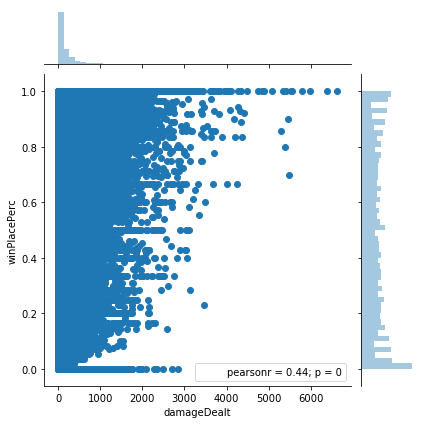

In [16]:
sns.jointplot(x='damageDealt',y='winPlacePerc',data=data_train)

下面进行行进距离分析

In [18]:
data = data_train[data_train.walkDistance < data_train.walkDistance.quantile(0.99)]

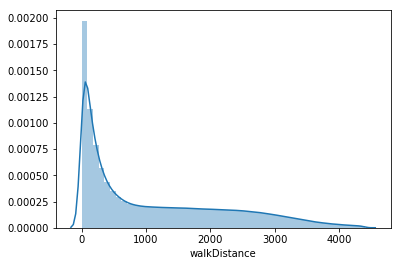

In [19]:
sns.distplot(data.walkDistance)

随着距离的增长，人数也越少，是不是可以那样认为，距离约长则成绩越好，下面看一下行走距离和最终成绩的关系

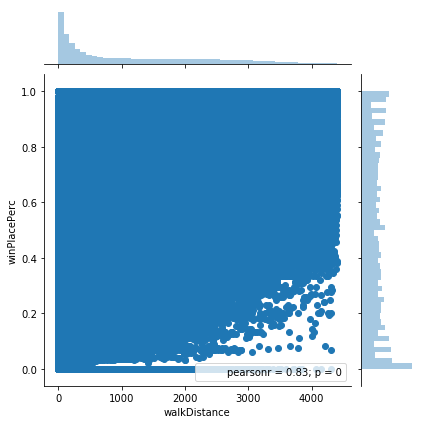

In [21]:
sns.jointplot(x='walkDistance',y='winPlacePerc',data=data)

从上图可知，相关系数达到0.83，walkDistance确实相关性很大

再看一下摧毁车辆和winPlacePerc的关系

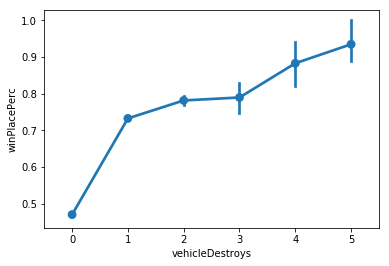

In [24]:
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data = data_train)

从图中可以看到随着摧毁车辆数的增大，winPlacePerc也随之增大

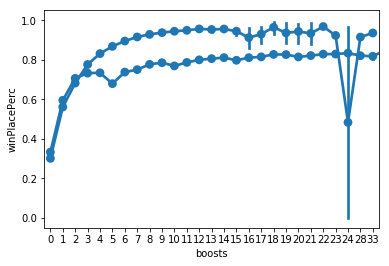

In [26]:
sns.pointplot(x='heals',y='winPlacePerc',data=data_train)
sns.pointplot(x='boosts',y='winPlacePerc',data=data_train)

In [22]:
import lightgbm as lgb 
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

特征选择，使用sklearn内置的特征交叉选择RPECV类，用交叉验证进行递归特征消除。

In [23]:
data_train1 = data_train.drop(['winPlacePerc','Id','groupId','matchId','matchType'],axis = 1)
data_train1.fillna(data_train1.mean())
#data_train1= data_train1.apply(lambda x: pd.to_numeric(x,errors='ignore'))
#StandardScaler().fit_transform(data_train1)
data_train1.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))#对每一列进行标准化


,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.59,0.571889,0.000000,0.00,...,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,0.009496,0.004237,0.728266
1,0.000000,0.000000,0.013826,0.000000,0.000000,0.0000,0.56,0.000000,0.000000,0.00,...,0.251227,0.000000,1.105380e-07,0.0,0.002888,0.0,0.0,0.055625,0.021186,0.000000
2,0.045455,0.000000,0.010278,0.000000,0.000000,0.0000,0.46,0.000000,0.000000,0.00,...,0.252411,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,0.006276,0.008475,0.000000
3,0.000000,0.000000,0.004973,0.000000,0.000000,0.0000,0.74,0.000000,0.000000,0.00,...,0.238369,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,0.007863,0.012712,0.000000
4,0.000000,0.000000,0.015115,0.000000,0.000000,0.0000,0.44,0.000000,0.013889,0.05,...,0.264084,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,0.001930,0.008475,0.000000
5,0.000000,0.000000,0.015115,0.018868,0.015625,0.0000,0.43,0.000000,0.013889,0.05,...,0.240061,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,0.001346,0.004237,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.95,0.581567,0.000000,0.00,...,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,0.000524,0.004237,0.743666
7,0.000000,0.000000,0.001291,0.000000,0.000000,0.0000,0.47,0.460829,0.000000,0.00,...,0.000000,0.000000,4.922623e-02,0.0,0.000000,0.0,0.0,0.042242,0.025424,0.745156
8,0.000000,0.000000,0.007799,0.000000,0.000000,0.0000,0.63,0.000000,0.000000,0.00,...,0.252749,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,0.031028,0.016949,0.000000
9,0.000000,0.000000,0.005633,0.000000,0.000000,0.0000,0.73,0.000000,0.000000,0.00,...,0.228388,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,0.002547,0.004237,0.000000


In [24]:
print(data_train1.isnull().any()) #用来判断某列是否有缺失值



assists            False
boosts             False
damageDealt        False
DBNOs              False
headshotKills      False
heals              False
killPlace          False
killPoints         False
kills              False
killStreaks        False
longestKill        False
matchDuration      False
maxPlace           False
numGroups          False
rankPoints         False
revives            False
rideDistance       False
roadKills          False
swimDistance       False
teamKills          False
vehicleDestroys    False
walkDistance       False
weaponsAcquired    False
winPoints          False
dtype: bool


In [25]:
data_train_label = data_train['winPlacePerc'].fillna(0)
print(data_train_label.isnull().sum())

0


In [ ]:
regressor = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                             learning_rate=0.05,n_estimators=720,
                             max_bin=55,bagging_fraction=0.8,
                             bagging_freq = 5)

selector = RFECV(regressor,cv=10)
selector.fit(data_train1,data_train_label)
optimized_predictors = data_train1.columns[selector.support_]
X_train = data_train[optimized_predictors]
Y_train=data_train["winPlacePerc"]

In [10]:
import lightgbm as lgb
regressor = lgb.LGBMRegressor(objective = 'regression',num_leaves=5,
                             learning_rate=0.05,n_estimators=720,
                             max_bin = 20,bagging_fraction=0.8,
                             bagging_freq=5,feature_fraction=0.8
                             )
regressor.fit(X_train,Y_train)


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, boosting_type='gbdt',
       class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
       importance_type='split', learning_rate=0.05, max_bin=20,
       max_depth=-1, min_child_samples=20, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=720, n_jobs=-1, num_leaves=5,
       objective='regression', random_state=None, reg_alpha=0.0,
       reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

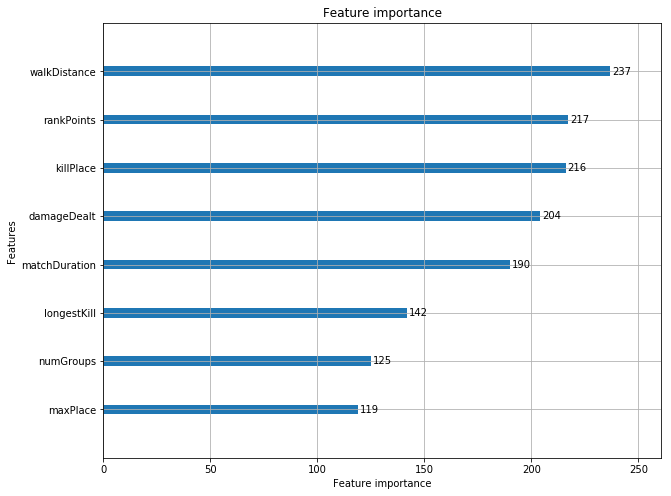

In [14]:
lgb.plot_importance(regressor,max_num_features=20,figsize=(10,8))
plt.plot('Feature importance')